## Import Mask Data

molecule_name:       Symbolic name of each molecule.  Musks have names such
                        as MUSK-188.  Non-musks have names such as
                        NON-MUSK-jp13.
                        
conformation_name:   Symbolic name of each conformation.  These
                        have the format MOL_ISO+CONF, where MOL is the
                        molecule number, ISO is the stereoisomer
                        number (usually 1), and CONF is the
                        conformation number. 
                        
f1 through f162:     These are "distance features" along rays (see
                      paper cited above).  The distances are
                        measured in hundredths of Angstroms.  The
                        distances may be negative or positive, since
                        they are actually measured relative to an
                        origin placed along each ray.  The origin was
                        defined by a "consensus musk" surface that is
                        no longer used.  Hence, any experiments with
                        the data should treat these feature values as
                        lying on an arbitrary continuous scale.  In
                        particular, the algorithm should not make any
                        use of the zero point or the sign of each
                        feature value. 
                        
   f163:                This is the distance of the oxygen atom in the
                        molecule to a designated point in 3-space.
                        This is also called OXY-DIS.
                        
   f164:                OXY-X: X-displacement from the designated
                        point.
                        
   f165:                OXY-Y: Y-displacement from the designated
                        point.
                        
   f166:                OXY-Z: Z-displacement from the designated
                        point. 
                        
   class:               0 => non-musk, 1 => musk


In [1]:
import pandas as pd
import numpy as np

musk=pd.read_csv('musk.csv')
musk.head(10)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
5,6,MUSK-211,211_1+14,46,-194,-145,28,-117,72,57,...,-138,-156,56,143,142,164,-67,-145,40,1
6,7,MUSK-211,211_1+15,47,-199,-106,28,-117,73,27,...,-133,-153,55,144,142,165,-68,-145,37,1
7,8,MUSK-211,211_1+16,41,-199,-101,22,-117,-6,26,...,-59,-1,50,100,135,169,-60,-135,81,1
8,9,MUSK-211,211_1+17,41,-199,-101,22,-117,-6,26,...,-59,-1,50,100,135,169,-60,-135,81,1
9,10,MUSK-211,211_1+18,47,-199,-106,28,-117,73,27,...,-133,-153,55,144,142,165,-68,-146,37,1


In [2]:
musk['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [3]:
musk_copy=musk.copy()
musk_copy=musk_copy.drop(['ID', 'molecule_name','conformation_name'], axis=1)
musk_copy.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1
5,46,-194,-145,28,-117,72,57,-168,-39,-22,...,-138,-156,56,143,142,164,-67,-145,40,1
6,47,-199,-106,28,-117,73,27,-104,-22,-23,...,-133,-153,55,144,142,165,-68,-145,37,1
7,41,-199,-101,22,-117,-6,26,-99,-21,-101,...,-59,-1,50,100,135,169,-60,-135,81,1
8,41,-199,-101,22,-117,-6,26,-100,-21,-101,...,-59,-1,50,100,135,169,-60,-135,81,1
9,47,-199,-106,28,-117,73,27,-104,-22,-23,...,-133,-153,55,144,142,165,-68,-146,37,1


In [4]:
# Clean up dataframe and select target
target = 'class'
features = musk_copy.columns != target

x = musk_copy.loc[:, features]
y = musk_copy[target]

## Principal Component Analysis (PCA)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [6]:
# Standardise range of all continuous predictor variables for model training to speed up
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
# Create a PCA instance: pca
pca = PCA(n_components=40)
# Let's check how much of the 166 predictor variable's multidimensional variance is retained by the components
z = pca.fit_transform(x_scaled)
pca.explained_variance_ratio_.sum()

C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


0.9542337249824426

In [7]:
print(z.shape)
print(x_scaled.shape)
print(y.shape)

(6598, 40)
(6598, 166)
(6598,)


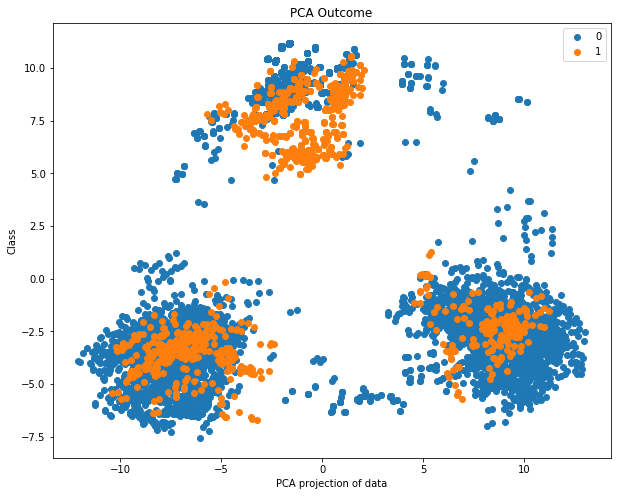

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(z[y==0, 0], z[y==0, 1], label='0')
ax.scatter(z[y==1, 0], z[y==1, 1], label='1')
ax.set(title='PCA Outcome', xlabel='PCA projection of data', ylabel='Class')
ax.legend()

Class 1 datapoints are well seperated from class 0, on top of blue datapoints.

## Linear Discriminant Analysis

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
z1 = lda.fit_transform(x,y)
lda

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [38]:
print(z1.shape)
print(x_scaled.shape)
print(y.shape)

(6598, 1)
(6598, 166)
(6598,)


In [39]:
lda.explained_variance_ratio_.sum()

1.0